# Eddington Standard Model

Let's look at the output from the [MESA stellar evolution code](https://docs.mesastar.org/) for 4 different mass progenitors: 0.3, 1, 8, and 15 $M_\odot$
and see how well the Eddington standard model does in comparison.

```{tip}
These models were all created using [MESA Web](http://user.astro.wisc.edu/~townsend/static.php?ref=mesa-web-submit) a web-based interface to MESA
for quick calculations.
```

To read in these files, we use [py_mesa_reader](https://github.com/wmwolf/py_mesa_reader)

````{tip}
`py_mesa_reader` is available on PyPI, so it can be installed using `pip` as:
```
pip install mesa_reader
```
````

## Loading the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mesa_reader as mr

MESA provides 2 types of output: profiles and a history.  The profiles represent a snapshot of the start at one instance of time and give the stellar data as a function of radius or enclosed mass.  The history provides some global quantities as a function of time throughout the entire evolution of the star.  We'll use both.

The model files are:

* $0.3 M_\odot$:
  * [M0.3_default_profile8.data](M0.3_default_profile8.data)
  * [M0.3_default_trimmed_history.data](M0.3_default_trimmed_history.data)
  
* $1 M_\odot$:
  * [M1_default_profile8.data](M1_default_profile8.data)
  * [M1_default_profile218.data](M1_default_profile218.data)
  * [M1_default_trimmed_history.data](M1_default_trimmed_history.data)

* $8 M_\odot$:
  * [M8_basic_co_profile8.data](M8_basic_co_profile8.data)
  * [M8_basic_co_profile39.data](M8_basic_co_profile39.data)
  * [M8_basic_co_trimmed_history.data](M8_basic_co_trimmed_history.data)

* $15 M_\odot$:
  * [M15_aprox21_profile8.data](M15_aprox21_profile8.data)
  * [M15_aprox21_profile19.data](M15_aprox21_profile19.data)
  * [M15_aprox21_trimmed_history.data](M15_aprox21_trimmed_history.data)

To make the management easier, we'll create a container for each model that holds the history and profiles, processed by `py_mesa_reader`

In [2]:
class Model:
    def __init__(self, mass, profiles=None, history=None):
        self.mass = mass
        if history:
            self.history = mr.MesaData(history)
        self.profiles = []
        if profiles:
            for p in profiles:
                self.profiles.append(mr.MesaData(p))

Now read in all the data.  For all but the lowest mass we have 2 profiles and 1 history.  The profiles were picked to roughly correspond to the midpoint of core H burning and core He burning.

In [3]:
models = []

models.append(Model(0.3, profiles=["M0.3_default_profile8.data"],
                    history="M0.3_default_trimmed_history.data"))

models.append(Model(1, profiles=["M1_default_profile8.data",
                                 "M1_default_profile218.data"],
                    history="M1_default_trimmed_history.data"))

models.append(Model(8, profiles=["M8_basic_co_profile8.data",
                                 "M8_basic_co_profile39.data"],
                    history="M8_basic_co_trimmed_history.data"))

models.append(Model(15, profiles=["M15_aprox21_profile8.data",
                                  "M15_aprox21_profile19.data"],
                    history="M15_aprox21_trimmed_history.data"))

## Creating Eddington profile

The Eddington standard model works for a fully radiative star with a constant composition.

In class, we found that the temperature and density in the Eddington standard model were related by

$$T(r) = 4.62\times 10^6 \beta\mu \left ( \frac{M}{M_\odot} \right)^{2/3} \rho^{1/3}(r)$$

We will assume that $\mu$ is constant and take $\mu$ and $\beta$ from the center of the star.

In [4]:
# CGS constants
k_B = 1.38e-16
m_u = 1.66e-24
m_e = 9.11e-28
c = 3.e10
h = 6.63e-27
a = 5.67e-15

In [5]:
def get_beta(profile):
    """compute the raito of gas to total pressure"""
    P_g = profile.Rho[0] * k_B * profile.T[0] / (profile.mu[0] * m_u)
    beta = P_g / profile.pressure[0]
    return beta

In [6]:
def eddington_T(rho, beta, mu, M):
    return 4.62e6 * beta * mu * M**(2./3.) * rho**(1./3.)

Here's our plotting function.  We will plot the data from the MESA model and the line corresponding to the Eddington standard model.

In [12]:
def make_plot(profile, beta, M):
    fig, ax = plt.subplots()
    ax.loglog(profile.Rho, profile.T)
    ax.loglog(profile.Rho, eddington_T(profile.Rho, beta, profile.mu[0], M),
              ls=":", label="Eddington standard model")
    ax.legend()
    ax.set_xlabel("rho [g/cc]")
    ax.set_ylabel("T [K]")
    ax.set_title(rf"M = {M} $M_\odot$; age = {profile.star_age/1.e6:.2f} Myr")
    ax.grid(ls=":")

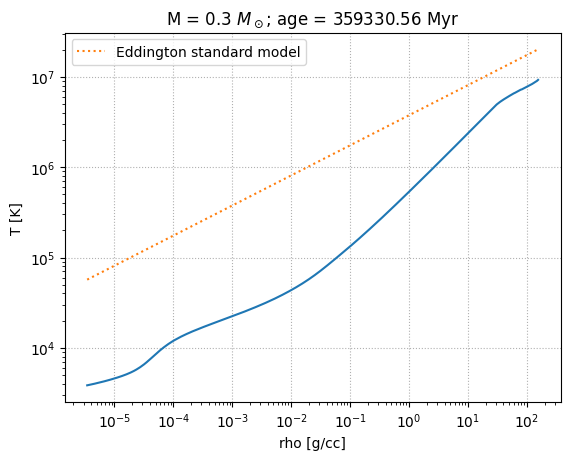

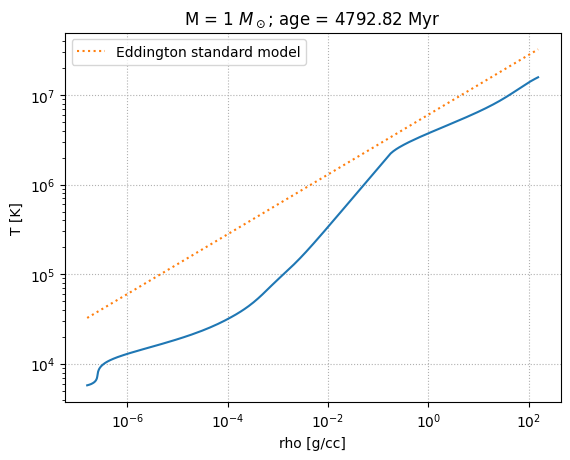

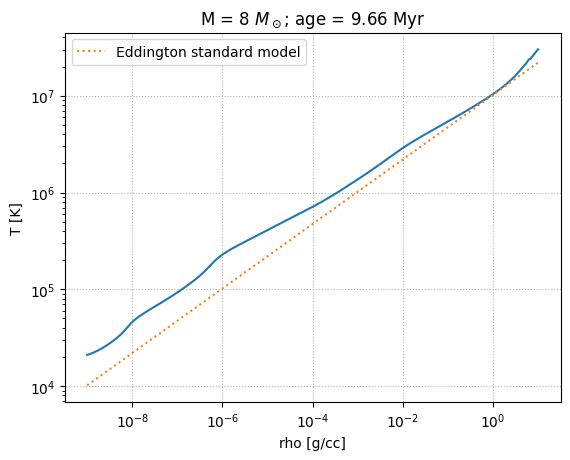

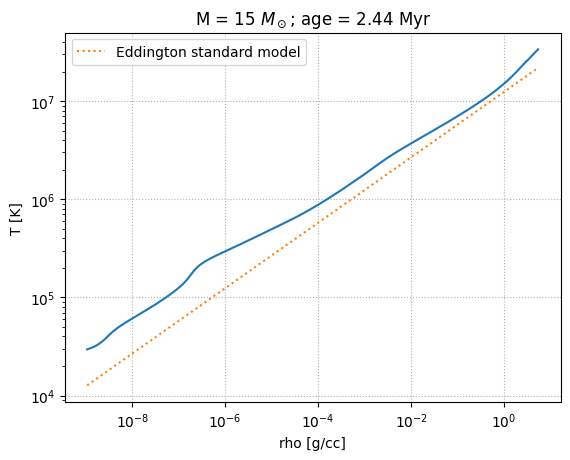

In [13]:
for star in models:
    M = star.mass
    p = star.profiles[0]
    beta = get_beta(p)

    fig = make_plot(p, beta, M)

We see that the high mass stars fit the Eddington profile well.